<a href="https://colab.research.google.com/github/APURVSAXENA/NLP/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [0]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)


In [0]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape


((2034,), (2034,))

In [0]:
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [0]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], dtype='<U18')

In [0]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1])

In [0]:
num_topics, num_top_words = 6,8

NLTK

In [0]:
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

STEMMING AND LEMITIZATION

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk import stem

In [0]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [0]:
word_list = ['feet', 'foot', 'foots', 'footing']


In [0]:
[wnl.lemmatize(word) for word in word_list]


['foot', 'foot', 'foot', 'footing']

In [0]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

In [0]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

In [0]:
vectorizer = CountVectorizer(stop_words='english')


In [0]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(2034, 26576)

In [0]:

print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [0]:
vocab = np.array(vectorizer.get_feature_names())

In [0]:
vocab.shape

(26576,)

In [0]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

In [0]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 1min 23s, sys: 4.86 s, total: 1min 28s
Wall time: 45.5 s


In [0]:
print(U.shape, s.shape, Vh.shape)


(2034, 2034) (2034,) (2034, 26576)


In [0]:
#Confirm this is a decomposition of the input.
s[:4]


array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

In [0]:
np.diag(np.diag(s[:4]))


array([433.92698542, 291.51012741, 240.71137677, 220.00048043])

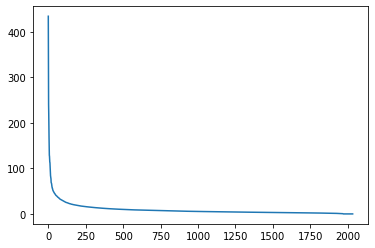

In [0]:
#What can we say about the singular values s?
plt.plot(s)

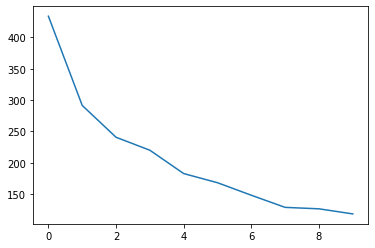

In [0]:
plt.plot(s[:10])

In [0]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [0]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

**Non-negative Matrix Factorization (NMF)**

In [0]:
m,n=vectors.shape
d=5  # num topics

In [0]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [0]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

TF-IDF

In [0]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [0]:
newsgroups_train.data[10:20]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [0]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [0]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

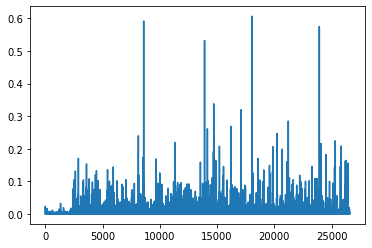

In [0]:
plt.plot(clf.components_[0])

In [0]:
clf.reconstruction_err_

43.712926057952785

In [0]:
from fastai import *
from fastai.text import *
from fastai.utils.mem import GPUMemTrace #call with mtrace

In [0]:
import sklearn.feature_extraction.text as sklearn_text
import pickle

In [0]:
path = untar_data(URLs.IMDB_SAMPLE)
path

PosixPath('/root/.fastai/data/imdb_sample')

In [0]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
%%time
# throws `BrokenProcessPool' Error sometimes. Keep trying `till it works!

count = 0
error = True
while error:
    try: 
        # Preprocessing steps
        movie_reviews = (TextList.from_csv(path, 'texts.csv', cols='text')
                         .split_from_df(col=2)
                         .label_from_df(cols=0))
        error = False
        print(f'failure count is {count}\n')    
    except: # catch *all* exceptions
        # accumulate failure count
        count = count + 1
        print(f'failure count is {count}')

failure count is 0

CPU times: user 240 ms, sys: 66.9 ms, total: 307 ms
Wall time: 3.39 s


In [0]:
movie_reviews

LabelLists;

Train: LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard to watch , because there is n

In [0]:
dir(movie_reviews)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_test',
 'add_test_folder',
 'databunch',
 'filter_by_func',
 'get_processors',
 'label_const',
 'label_empty',
 'label_from_df',
 'label_from_folder',
 'label_from_func',
 'label_from_list',
 'label_from_lists',
 'label_from_re',
 'lists',
 'load_empty',
 'load_state',
 'path',
 'process',
 'test',
 'train',
 'transform',
 'transform_y',
 'valid']

In [0]:
print(f'There are {len(movie_reviews.train.x)} and {len(movie_reviews.valid.x)} reviews in the training and validations sets, respectively.')

There are 800 and 200 reviews in the training and validations sets, respectively.


In [0]:
print(f'There are {len(movie_reviews.train.x)} and {len(movie_reviews.valid.x)} reviews in the training and validations sets, respectively.')

There are 800 and 200 reviews in the training and validations sets, respectively.


In [0]:
print(f'\fThere are {len(movie_reviews.train.x)} movie reviews in the training set\n')
print(movie_reviews.train)

There are 800 movie reviews in the training set

LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard

In [0]:
print(f'\fThere are {len(movie_reviews.train.x)} movie reviews in the training set\n')
print(movie_reviews.train)

There are 800 movie reviews in the training set

LabelList (800 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though several faces will be familiar . xxmaj the entire cast does an excellent job with the script . 
 
  xxmaj but it is hard

In [0]:
print(movie_reviews.train.x[0].text)
print(f'\nThere are {len(movie_reviews.train.x[0].text)} characters in the review')

xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !

There are 511 characters in the review


In [0]:
print(movie_reviews.train.x[0].text.split())
print(f'\nThe review has {len(movie_reviews.train.x[0].text.split())} tokens')

['xxbos', 'xxmaj', 'un', '-', 'xxunk', '-', 'believable', '!', 'xxmaj', 'meg', 'xxmaj', 'ryan', 'does', "n't", 'even', 'look', 'her', 'usual', 'xxunk', 'lovable', 'self', 'in', 'this', ',', 'which', 'normally', 'makes', 'me', 'forgive', 'her', 'shallow', 'xxunk', 'acting', 'xxunk', '.', 'xxmaj', 'hard', 'to', 'believe', 'she', 'was', 'the', 'producer', 'on', 'this', 'dog', '.', 'xxmaj', 'plus', 'xxmaj', 'kevin', 'xxmaj', 'kline', ':', 'what', 'kind', 'of', 'suicide', 'trip', 'has', 'his', 'career', 'been', 'on', '?', 'xxmaj', 'xxunk', '...', 'xxmaj', 'xxunk', '!', '!', '!', 'xxmaj', 'finally', 'this', 'was', 'directed', 'by', 'the', 'guy', 'who', 'did', 'xxmaj', 'big', 'xxmaj', 'xxunk', '?', 'xxmaj', 'must', 'be', 'a', 'replay', 'of', 'xxmaj', 'jonestown', '-', 'hollywood', 'style', '.', 'xxmaj', 'xxunk', '!']

The review has 103 tokens


In [0]:
movie_reviews.vocab

In [0]:
movie_reviews.vocab.stoi

defaultdict(int,
            {'xxunk': 0,
             'xxpad': 1,
             'xxbos': 2,
             'xxeos': 3,
             'xxfld': 4,
             'xxmaj': 5,
             'xxup': 6,
             'xxrep': 7,
             'xxwrep': 8,
             'the': 9,
             '.': 10,
             ',': 11,
             'and': 12,
             'a': 13,
             'of': 14,
             'to': 15,
             'is': 16,
             'it': 17,
             'in': 18,
             'i': 19,
             'that': 20,
             'this': 21,
             '"': 22,
             "'s": 23,
             '\n \n ': 24,
             '-': 25,
             'was': 26,
             'as': 27,
             'for': 28,
             'movie': 29,
             'with': 30,
             'but': 31,
             'film': 32,
             'you': 33,
             ')': 34,
             'on': 35,
             '(': 36,
             "n't": 37,
             'are': 38,
             'he': 39,
             'his': 40,
       

In [0]:
movie_reviews.vocab.itos


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that',
 'this',
 '"',
 "'s",
 '\n \n ',
 '-',
 'was',
 'as',
 'for',
 'movie',
 'with',
 'but',
 'film',
 'you',
 ')',
 'on',
 '(',
 "n't",
 'are',
 'he',
 'his',
 'not',
 'have',
 'be',
 'one',
 'they',
 'all',
 'at',
 'by',
 'an',
 'from',
 'like',
 '!',
 'so',
 'who',
 'there',
 'about',
 'just',
 'out',
 'if',
 'or',
 'do',
 "'",
 'what',
 'her',
 'has',
 'some',
 'more',
 'good',
 'when',
 'up',
 'very',
 '?',
 'she',
 'would',
 'no',
 'really',
 'were',
 'their',
 'my',
 'had',
 'time',
 'can',
 'only',
 'which',
 'even',
 'see',
 'story',
 'me',
 'into',
 'did',
 ':',
 'well',
 'we',
 'will',
 'does',
 'than',
 'also',
 'get',
 '...',
 'people',
 'other',
 'bad',
 'been',
 'could',
 'first',
 'much',
 'how',
 'most',
 'any',
 'because',
 'two',
 'then',
 'great',
 'him',
 'its',
 'too',
 'made',
 'them',
 'after',


In [0]:
print('itos ', 'length ',len(movie_reviews.vocab.itos),type(movie_reviews.vocab.itos) )
print('stoi ', 'length ',len(movie_reviews.vocab.stoi),type(movie_reviews.vocab.stoi) )


itos  length  6008 <class 'list'>
stoi  length  19159 <class 'collections.defaultdict'>


In [0]:
rare_words = ['acrid','a_random_made_up_nonexistant_word','acrimonious','allosteric','anodyne','antikythera']
for word in rare_words:
    print(movie_reviews.vocab.stoi[word])

0
0
0
0
0
0


In [0]:
print(movie_reviews.vocab.itos[0])

xxunk


In [0]:
print(f'len(stoi) = {len(movie_reviews.vocab.stoi)}')
print(f'len(itos) = {len(movie_reviews.vocab.itos)}')
print(f'len(stoi) - len(itos) = {len(movie_reviews.vocab.stoi) - len(movie_reviews.vocab.itos)}')

len(stoi) = 19164
len(itos) = 6008
len(stoi) - len(itos) = 13156


In [0]:
unk = []
for word, num in movie_reviews.vocab.stoi.items():
    if num==0:
        unk.append(word)

In [0]:
len(unk)

13157

In [0]:
unk[:25]

['xxunk',
 'bleeping',
 'pert',
 'ticky',
 'schtick',
 'whoosh',
 'banzai',
 'chill',
 'wooofff',
 'cheery',
 'superstars',
 'fashionable',
 'cruelly',
 'separating',
 'mistreat',
 'tensions',
 'religions',
 'baseness',
 'nobility',
 'puro',
 'disowned',
 'option',
 'faults',
 'dignified',
 'realisation']

In [0]:
print(f'There are {len(movie_reviews.vocab.itos)} unique tokens in the IMDb review sample vocabulary')
print(f'The numericalized token values run from {min(movie_reviews.vocab.stoi.values())} to {max(movie_reviews.vocab.stoi.values())} ')

There are 6008 unique tokens in the IMDb review sample vocabulary
The numericalized token values run from 0 to 6007 


In [0]:
TokenCounter = lambda review_index : Counter((movie_reviews.train.x)[review_index].data)
TokenCounter(0).items()

dict_items([(2, 1), (5, 15), (4619, 1), (25, 3), (0, 8), (867, 1), (52, 5), (3776, 1), (1800, 1), (95, 1), (37, 1), (85, 1), (192, 1), (64, 2), (935, 1), (2738, 1), (517, 1), (18, 1), (21, 3), (11, 1), (84, 1), (2417, 1), (193, 1), (88, 1), (3777, 1), (1801, 1), (127, 1), (10, 3), (269, 1), (15, 1), (273, 1), (73, 1), (26, 2), (9, 2), (1360, 1), (35, 2), (1213, 1), (1144, 1), (1145, 1), (2418, 1), (91, 1), (63, 1), (245, 1), (14, 2), (1361, 1), (1447, 1), (65, 1), (40, 1), (796, 1), (103, 1), (72, 2), (99, 1), (534, 1), (616, 1), (48, 1), (282, 1), (54, 1), (90, 1), (219, 1), (228, 1), (43, 1), (13, 1), (3778, 1), (3779, 1), (355, 1), (492, 1)])